In [ ]:
pip install gymnasium

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import gymnasium as gym

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('Ads_Clicks.csv')

In [ ]:
df #number of ads = 10

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [ ]:
num_ads=10

In [ ]:
# ε-greedy algorithm
import random
import numpy as np
def epsilon_greedy(epsilon, rewards):
    if random.uniform(0, 1) < epsilon:
        ad = random.randint(0, num_ads - 1)
    else:
        ad = np.argmax(rewards)
    return ad

In [ ]:
rewards = [0] * num_ads
total_rewards_01 = []
total_rewards_03 = []

In [ ]:

for t in range(2000):
    ad_01 = epsilon_greedy(0.01, rewards)
    ad_03 = epsilon_greedy(0.3, rewards) # for epsilon = 0.01
    reward = df.iloc[t][ad_01]

    rewards[ad_01] = rewards[ad_01] + reward

    total_rewards_01.append(sum(rewards))

    reward = df.iloc[t][ad_03]
    rewards[ad_03] = rewards[ad_03] + reward
    total_rewards_03.append(sum(rewards))

In [ ]:
print("Total rewards for ε=0.01: ", total_rewards_01[-1])
print("Total rewards for ε=0.3: ", total_rewards_03[-1])

Total rewards for ε=0.01:  651
Total rewards for ε=0.3:  651


In [ ]:
# Upper-Confidence-Bound algorithm
def ucb(rewards, n, t, c=1.5):
    # Calculate the average reward for each ad
    average_rewards = rewards / n
    # Calculate the upper confidence bound for each ad
    ucb_values = average_rewards + c * np.sqrt(np.log(t + 1) / n)
    # Choose the ad with the highest UCB value
    ad = np.argmax(ucb_values)
    return ad

In [ ]:
# Initialize the rewards for each ad to 0 and create an empty list to store the rewards for each time step:
rewards = np.zeros(num_ads)
n = np.zeros(num_ads)
total_rewards = []

In [ ]:
for t in range(2000):
    ad = ucb(rewards, n, t, c=1.5)
    reward = df.iloc[t][ad]

    rewards[ad] = rewards[ad] + reward

    n[ad] = n[ad] + 1
    total_rewards.append(sum(rewards))

    print("Total rewards for c=1.5: ", total_rewards[-1])

Total rewards for c=1.5:  1.0
Total rewards for c=1.5:  1.0
Total rewards for c=1.5:  1.0
Total rewards for c=1.5:  1.0
Total rewards for c=1.5:  1.0
Total rewards for c=1.5:  1.0
Total rewards for c=1.5:  1.0
Total rewards for c=1.5:  1.0
Total rewards for c=1.5:  1.0
Total rewards for c=1.5:  1.0
Total rewards for c=1.5:  1.0
Total rewards for c=1.5:  1.0
Total rewards for c=1.5:  1.0
Total rewards for c=1.5:  1.0
Total rewards for c=1.5:  1.0
Total rewards for c=1.5:  1.0
Total rewards for c=1.5:  1.0
Total rewards for c=1.5:  1.0
Total rewards for c=1.5:  1.0
Total rewards for c=1.5:  1.0
Total rewards for c=1.5:  1.0
Total rewards for c=1.5:  1.0
Total rewards for c=1.5:  1.0
Total rewards for c=1.5:  1.0
Total rewards for c=1.5:  2.0
Total rewards for c=1.5:  2.0
Total rewards for c=1.5:  2.0
Total rewards for c=1.5:  2.0
Total rewards for c=1.5:  2.0
Total rewards for c=1.5:  2.0
Total rewards for c=1.5:  3.0
Total rewards for c=1.5:  3.0
Total rewards for c=1.5:  3.0
Total rewa

C:\Users\mca\AppData\Local\Temp\ipykernel_3272\3941024938.py:4: RuntimeWarning: invalid value encountered in true_divide
  average_rewards = rewards / n
C:\Users\mca\AppData\Local\Temp\ipykernel_3272\3941024938.py:6: RuntimeWarning: invalid value encountered in true_divide
  ucb_values = average_rewards + c * np.sqrt(np.log(t + 1) / n)
C:\Users\mca\AppData\Local\Temp\ipykernel_3272\3941024938.py:6: RuntimeWarning: divide by zero encountered in true_divide
  ucb_values = average_rewards + c * np.sqrt(np.log(t + 1) / n)


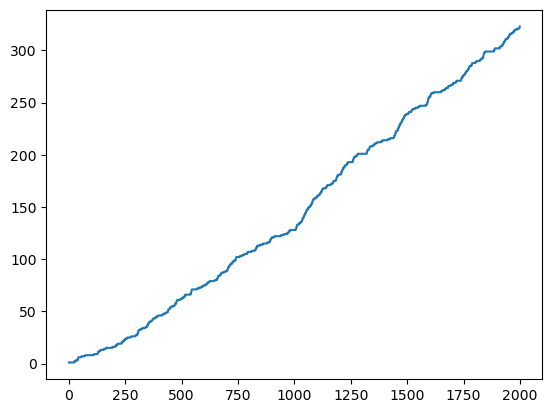

In [ ]:
import matplotlib.pyplot as plt
plt.plot(total_rewards)